In [54]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split

In [55]:
np.random.seed(0)

In [56]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [57]:
X_train.shape

(60000, 28, 28)

In [58]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [59]:
y_train.shape

(60000,)

In [60]:
assert(X_train.shape[0] == y_train.shape[0]),"이미지의 숫자와 라벨의 숫자가 일치하지 않는다"
assert(X_test.shape[0] == y_test.shape[0]),"이미지의 숫자와 라벨의 숫자가 일치하지 않는다"
assert(X_train.shape[1:] ==(28,28)), "이미지의 크기가 28*28이아니다"
assert(X_test.shape[1:] ==(28,28)), "이미지의 크기가 28*28이아니다"

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


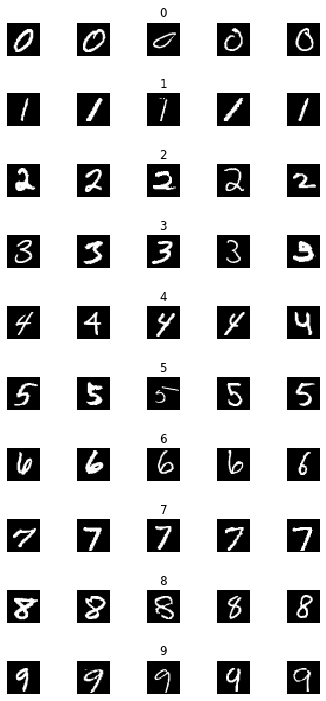

In [61]:
num_of_samples = []
cols = 5
num_class = 10
fig,axes = plt.subplots(nrows=num_class, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_class):
        x_selected = X_train[y_train == j]
        axes[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:],cmap='gray')
        axes[j][i].axis("off")
        if i== 2:
            axes[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))
            print(x_selected.shape)

Text(0, 0.5, 'Number of image')

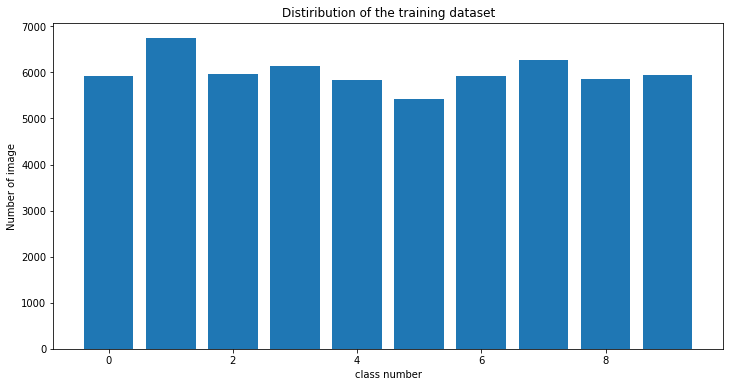

In [62]:
num_of_samples
plt.figure(figsize=(12,6))
plt.bar(range(0,10),num_of_samples)
plt.title('Distiribution of the training dataset')
plt.xlabel("class number")
plt.ylabel("Number of image")

In [89]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [90]:
X_train = X_train/255
X_test = X_test/255

In [91]:
X_train_flatten = X_train.reshape(X_train.shape[0],-1)

In [92]:
X_test_flatten = X_test.reshape(X_test.shape[0],-1)

In [93]:
X_train = X_train_flatten
X_test = X_test_flatten

In [94]:
def create_model():
    model = Sequential()
    model.add(Dense(30,input_dim=X_train.shape[1],activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    
    model.compile(optimizer=Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [95]:
model = create_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_9 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________
None


In [96]:
history = model.fit(X_train,y_train,validation_split=0.1,epochs=10,batch_size=200,verbose=1,shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
  200/54000 [..............................] - ETA: 6s

ValueError: Dimensions must be equal, but are 200 and 2000 for 'loss/dense_10_loss/softmax_cross_entropy_with_logits' (op: 'SoftmaxCrossEntropyWithLogits') with input shapes: [200,10], [2000,10].

In [97]:
import pandas as pd

In [72]:
df = pd.DataFrame(model.history.history)

In [73]:
df

,loss,accuracy,val_loss,val_accuracy
0,0.677870,0.786167,0.301139,0.909333
1,0.323349,0.905333,0.250543,0.924167
2,0.290292,0.913926,0.229737,0.928333
3,0.271954,0.917833,0.240293,0.925833
4,0.260530,0.923259,0.224654,0.930167
5,0.256566,0.923056,0.227113,0.932167
6,0.247733,0.926333,0.224830,0.933833
7,0.241139,0.928074,0.231899,0.929500
8,0.244283,0.928296,0.220561,0.935833
9,0.239479,0.927944,0.235113,0.931833


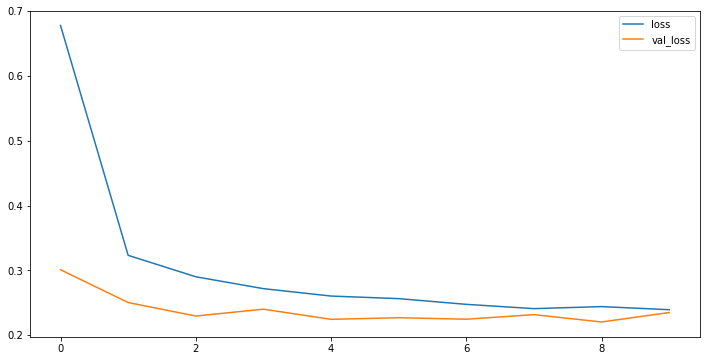

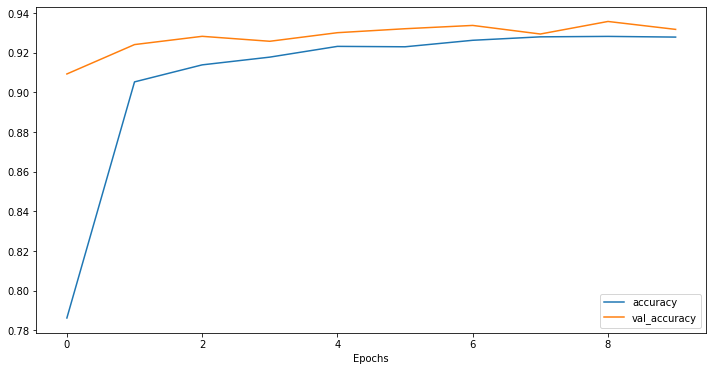

In [74]:
df[['loss','val_loss']].plot(figsize=(12,6))
df[['accuracy','val_accuracy']].plot(figsize=(12,6))
plt.xlabel('Epochs')
plt.legend()

In [75]:
score = model.evaluate(X_test,y_test,verbose=0)
print(type(score))

<class 'list'>


In [76]:
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

Test score:  0.2623955500751734
Test accuracy:  0.9244


In [77]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url,stream=True)

In [78]:
image = Image.open(response.raw)



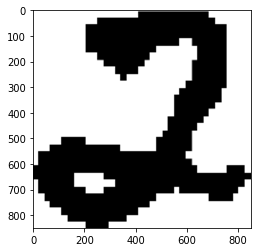

In [79]:
plt.imshow(image)

In [80]:
import cv2

image_array = np.asarray(image)

In [81]:
image_array.shape

(850, 850, 4)

In [82]:
resized = cv2.resize(image_array,(28,28)) # 28*28 크기이므로바꿔줘야함
gray_scale = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)

In [83]:
image = cv2.bitwise_not(gray_scale) #우리가 학습시킨건 숫자가 흰색 배경이 검정이므로 바꿔줘야함

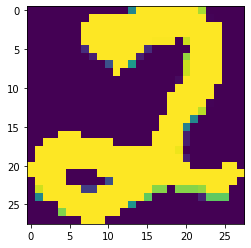

In [84]:
plt.imshow(image)

In [85]:
image = image/255

In [86]:
image = image.reshape(1,-1)

In [87]:
prediction = model.predict_classes(image)

In [88]:
prediction

array([5])